### Python para Data Science 
### Edgar Acuna
### IV. Calculo de  medidas estadisticas de centralidad y de dispersion-Boxplot
###  Enero 2020

In [14]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from scipy import stats 

In [15]:
#este cojunto de datos esta disponible en kaggle.com
df=pd.read_csv("http://academic.uprm.edu/eacuna/student-por.csv",sep=",")

In [16]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [17]:
#Dimension de la base de datos
print(df.shape)

(649, 33)


In [18]:
#Promedio de la variable age
np.mean(df['age'])

16.7442218798151

In [19]:
#Mediana de la variable age
np.median(df['age'])

17.0

In [20]:
#Calculo de la media usando el modulo stats
stats.describe(df['age'])

DescribeResult(nobs=649, minmax=(15, 22), mean=16.7442218798151, variance=1.483859308718066, skewness=0.41583144316169546, kurtosis=0.06172808922743078)

In [21]:
#calculando la moda de la variable age
stats.mode(df['age'])[0][0]

17

In [22]:
#Calculando la moda de la variable school
stats.mode(df['school'])

ModeResult(mode=array(['GP'], dtype=object), count=array([423]))

In [23]:
#calculando la media podada del 10% de la variable age
stats.trim_mean(df['age'],.1)

16.700575815738965

In [24]:
#Calulando la varianza de la variable age usando numpy
np.var(df['age'])

1.4815729307385221

In [25]:
#Calculando la media de la variable age usando stats
media=stats.describe(df['age'])[2]
print("la media es:", media)

la media es: 16.7442218798151


### La diferencia de los calculos de la varianza es que en numpy, por defecto, en la formula de la varianza dividen entre n en cambio en stats dividen entre n-1. En la siguiente celda, hacemos que salgan iguales.

In [26]:
#Calculando la varianza de la variable age usando numpy pero dividienedo entre n-1
np.var(df['age'],ddof=1)

1.483859308718057

In [27]:
#Calculando la desviacion estandar de la variable age. El modulo stats no calcula la desviaicon estandar
np.std(df['age'],ddof=1)

1.2181376394800618

In [28]:
#Calculando el coeficiente de variacion
stats.variation(df['age'])*100

7.269366194936092

In [29]:
#Primer Criterio para outliers
lower=np.mean(df['age'])-3*np.std(df['age'],ddof=1)
upper=np.mean(df['age'])+3*np.std(df['age'],ddof=1) 
print ("El intervalo donde caen los datos que NO son outliers es:", "\n",lower,"-",upper)

El intervalo donde caen los datos que NO son outliers es: 
 13.089808961374915 - 20.398634798255287


In [30]:
#Identificando outliers
for a in df['age']:
    if (a<lower or a>upper):
        print("outlier",a)        

outlier 22
outlier 21
outlier 21


{'whiskers': [<matplotlib.lines.Line2D at 0x1dd569cfd68>,
 'caps': [<matplotlib.lines.Line2D at 0x1dd569ec6d8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dd569cfc18>],
 'medians': [<matplotlib.lines.Line2D at 0x1dd569ecd68>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dd569ece48>],
 'means': []}

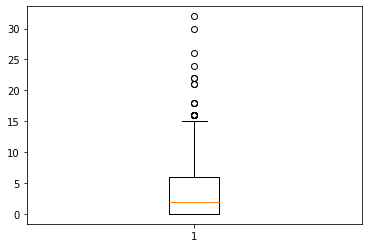

In [31]:
#Trazando el boxplot con matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.boxplot(df["absences"])

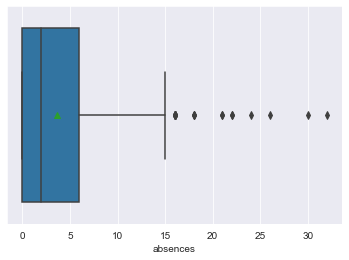

In [32]:
#Trazando el Boxplot con seaborn
import seaborn as sns
sns.set_style("darkgrid")
ax=sns.boxplot(x=df["absences"],showmeans=True)